In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
VTB = pd.read_csv('VTBR_190101_191231.csv', decimal = ".")
SBER = pd.read_csv('SBER_190101_191231.csv', decimal = ".")
VTB['<CLOSE>'] = VTB['<CLOSE>']*1000
VTB

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,VTBR,D,20190103,0,34.210
1,VTBR,D,20190104,0,34.620
2,VTBR,D,20190108,0,34.840
3,VTBR,D,20190109,0,35.000
4,VTBR,D,20190110,0,35.045
...,...,...,...,...,...
247,VTBR,D,20191224,0,46.350
248,VTBR,D,20191225,0,45.980
249,VTBR,D,20191226,0,46.000
250,VTBR,D,20191227,0,45.880


In [85]:
SBER

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>
0,SBER,D,20190103,0,186.99
1,SBER,D,20190104,0,190.99
2,SBER,D,20190108,0,191.24
3,SBER,D,20190109,0,197.00
4,SBER,D,20190110,0,196.75
...,...,...,...,...,...
247,SBER,D,20191224,0,248.67
248,SBER,D,20191225,0,248.04
249,SBER,D,20191226,0,248.24
250,SBER,D,20191227,0,252.06


In [86]:
res = pd.merge(VTB, SBER, on='<DATE>') #Соединяем датасеты, чтобы обойти разницу в длине датасетов
res

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y
0,VTBR,D,20190103,0,34.210,SBER,D,0,186.99
1,VTBR,D,20190104,0,34.620,SBER,D,0,190.99
2,VTBR,D,20190108,0,34.840,SBER,D,0,191.24
3,VTBR,D,20190109,0,35.000,SBER,D,0,197.00
4,VTBR,D,20190110,0,35.045,SBER,D,0,196.75
...,...,...,...,...,...,...,...,...,...
247,VTBR,D,20191224,0,46.350,SBER,D,0,248.67
248,VTBR,D,20191225,0,45.980,SBER,D,0,248.04
249,VTBR,D,20191226,0,46.000,SBER,D,0,248.24
250,VTBR,D,20191227,0,45.880,SBER,D,0,252.06


In [87]:
x = res['<CLOSE>_x'] #Цена закрытия VTB
y = res['<CLOSE>_y'] #Цена закрытия SBER
#Првъавильно ли я понимаю, что результативный признак - SBER
#а факторный VTB

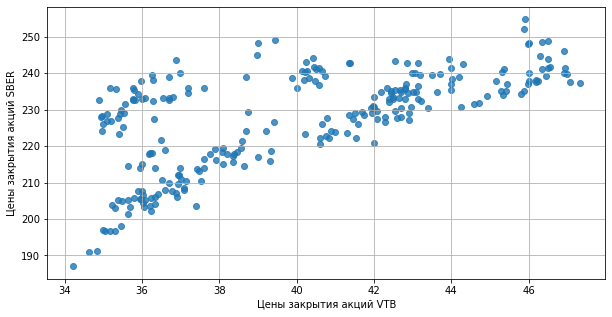

In [88]:
plt.figure(figsize = (10, 5))
sns.regplot(x=x, y=y, fit_reg=False)
plt.xlabel('Цены закрытия акций VTB')
plt.ylabel('Цены закрытия акций SBER')
plt.grid(True)

In [95]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x): #метод предскаания по факторам
        return self.b0 + self.b1 * x
    
    def error(self, X, Y): #Фцнция ошибки
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    
    #ГРАДИЕНТНЫЙ СПУСК С ОДНОЙ ИТЕРАЦИЕЙ
    #def BGD(self, X, Y): #Метод градиентного спуска
     #   alpha = 0.00005
      #  dJ0 = sum(self.predict(X) - Y) /len(X) # так как b-bias
       # dJ1 = sum((self.predict(X) - Y) * X) /len(X) # Веса при признаках
        
       # self.b0 -= alpha * dJ0
       # self.b1 -= alpha * dJ1
    
    def BGD(self, X, Y, alpha=0.000005, accuracy=0.01):
        steps, errors = [], [] #номер итерации и ошибка на данной итерации
        step = 0        
        old_err = hyp.error(X, Y)
        new_err = hyp.error(X, Y) - 1 #зЗачем вычитаем 1???
        dJ = 1 #так как разнница функций ошибок 1 (см. пред. 2 строчки)
        while dJ > accuracy:
            dJ0 = sum(self.predict(X) - Y) /len(X) #двойики нет, так как она сократилась (см. метод def error)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            old_err = new_err
            new_err = hyp.error(X, Y)
            dJ = old_err - new_err #Разница функции ошибок на предыдущей и текущей итерциях 
            if dG
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors


In [90]:
hyp = hypothesis() #Объект регрессии
print(hyp.predict(0)) 
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 25899.789020634922


In [91]:
a, b = VTB['<CLOSE>'].min(), VTB['<CLOSE>'].max()

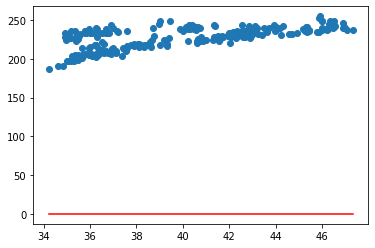

In [92]:
X0 = np.linspace(a, b, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 21915.644379930272


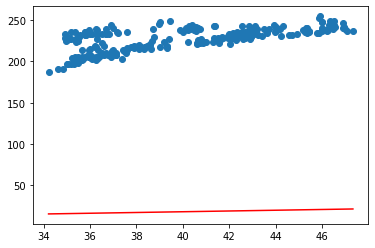

In [93]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

X0 = np.linspace(a, b, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()


Запускаем усовершенствованный градиентный спуск

In [97]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
#print(steps)
#print(errors)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 126.24295998629997


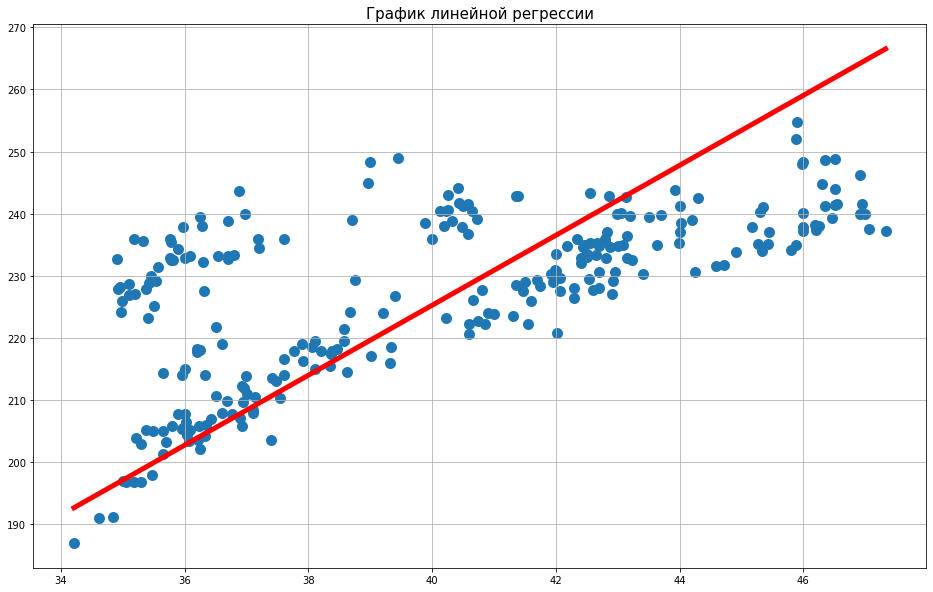

In [113]:
X0 = np.linspace(a, b, 100)
Y0 = hyp.predict(X0)

fig = plt.figure(figsize=(16, 10))
plt.scatter(x, y, lw=5)
plt.plot(X0, Y0, 'r', lw=5)
plt.title('График линейной регрессии', fontsize = 15)
plt.grid(True)
plt.show()

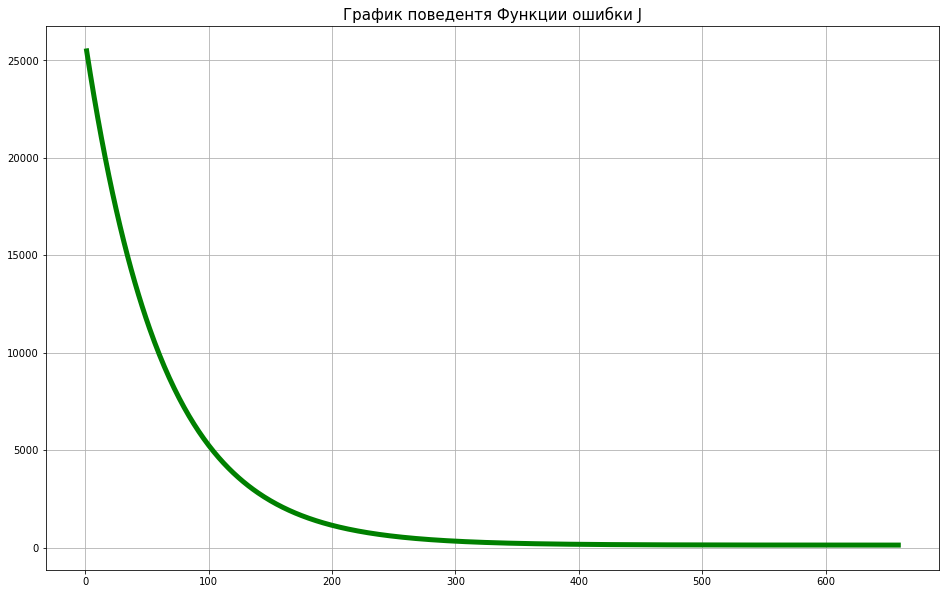

In [114]:
fig = plt.figure(figsize=(16, 10))
plt.plot(steps, 
         errors,
         'g', 
         lw=5)
plt.title('График поведентя Функции ошибки J', fontsize = 15)
plt.grid(True)
plt.show()

In [115]:
from sklearn.linear_model import LinearRegression

In [118]:
regresion = LinearRegression() # создаем объект линейной регресси

In [127]:
model = regresion.fit(np.array(res['<CLOSE>_x']).reshape(-1, 1), res['<CLOSE>_y']) #x - вектор признаков, y - вектор целей

In [130]:
model.intercept_ # b - bias

131.1535206853806

In [132]:
model.coef_ #Веса признаков

array([2.40405773])

In [134]:
model.score(np.array(res['<CLOSE>_x']).reshape(-1, 1), res['<CLOSE>_y']) #фУНКЦИЯ ошибки

0.4340332819121091

Стоит отметить, что функция ошибки значиетльно лучше, чем функция ошбики написанные нами

In [145]:
model.predict(np.array(res['<CLOSE>_x']).reshape(-1, 1)) #предсказанные значения модели 

array([213.39633558, 214.38199924, 214.91089195, 215.29554118,
       215.40372378, 215.74029186, 216.0167585 , 216.41342803,
       216.85817871, 216.99040188, 220.34406241, 219.83921029,
       220.34406241, 221.38982752, 219.92335231, 220.00749433,
       219.95941317, 221.11336088, 221.25760435, 221.95478109,
       222.30336946, 223.33711428, 223.01256649, 221.57013185,
       220.12769722, 220.41618414, 221.54609128, 222.26730859,
       220.06759577, 217.79576122, 219.14203355, 218.49293796,
       218.28859305, 218.70930316, 217.85586266, 217.89192353,
       218.27657277, 217.21878736, 217.59141631, 217.45919314,
       217.77172064, 217.62747718, 216.0167585 , 216.48554976,
       215.82443388, 216.18504254, 216.85817871, 218.51697854,
       218.21647132, 221.04123915, 219.91133202, 219.55072336,
       219.35839874, 218.93768864, 217.69959891, 218.49293796,
       218.30061334, 217.57939602, 217.69959891, 216.84615842,
       218.16839017, 218.18041046, 219.16607412, 218.90

In [148]:
len(model.predict(np.array(res['<CLOSE>_x']).reshape(-1, 1))) #длина массива предсказанных значений

252

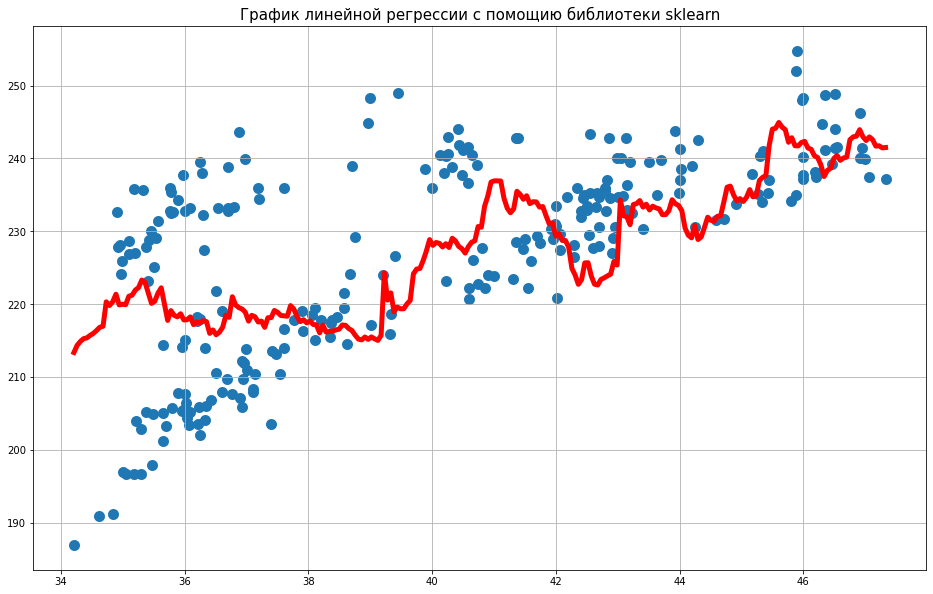

In [147]:
pred = model.predict(np.array(res['<CLOSE>_x']).reshape(-1, 1))
X0 = np.linspace(a, b, len(pred))

fig = plt.figure(figsize=(16, 10))
plt.scatter(x, y, lw=5)
plt.plot(X0, pred, 'r', lw=5)
plt.title('График линейной регрессии с помощию библиотеки sklearn', fontsize = 15)
plt.grid(True)
plt.show()